# Hand Digit Recognition

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

## Loading Dataset

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
X_train.shape

(60000, 28, 28)

In [105]:
X_test.shape

(10000, 28, 28)

### Plotting Image

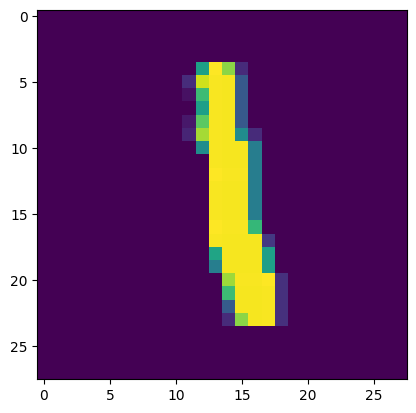

In [9]:
import matplotlib.pyplot as plt
plt.imshow(X_train[6])

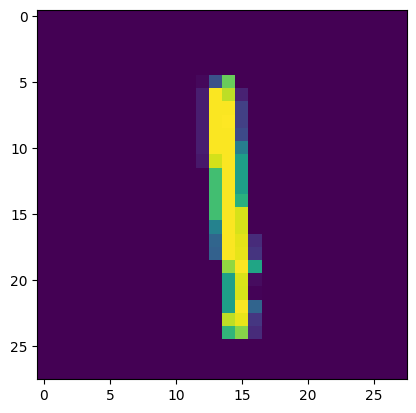

In [10]:
plt.imshow(X_train[8])

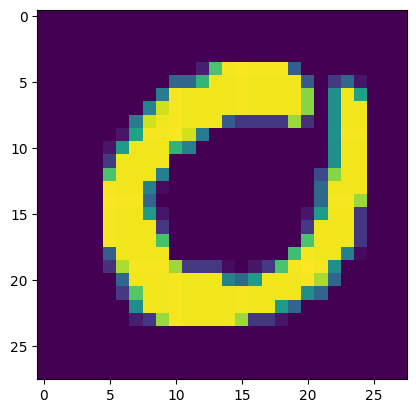

In [11]:
plt.imshow(X_train[121])

In [12]:
# Checking the value of X_train[0]
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [13]:
# Dividing these values by 255 for ANN
X_train = X_train/255
X_test = X_test/255

In [14]:
X_train[0] # now we have all the images pixel value between 0-1

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Creating Model

In [122]:
model = Sequential()

### Using Flatten to convert multi dimensional array in to 1-D Array 

In [123]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [124]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 64)                50240     
                                                                 
 dense_22 (Dense)            (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


## Compiling Model

In [125]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

### Fitting Data in Model

In [126]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3990 - accuracy: 0.8864 - val_loss: 0.2936 - val_accuracy: 0.9177
Epoch 2/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3063 - accuracy: 0.9145 - val_loss: 0.2909 - val_accuracy: 0.9187
Epoch 3/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2975 - accuracy: 0.9162 - val_loss: 0.2966 - val_accuracy: 0.9168
Epoch 4/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2961 - accuracy: 0.9185 - val_loss: 0.2913 - val_accuracy: 0.9203
Epoch 5/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2967 - accuracy: 0.9176 - val_loss: 0.2782 - val_accuracy: 0.9252
Epoch 6/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2995 - accuracy: 0.9169 - val_loss: 0.3142 - val_accuracy: 0.9158
Epoch 7/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3032 - accuracy: 0.9171 - val_loss: 0.2984 - val_accuracy:

In [127]:
y_prob = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [128]:
y_pred = y_prob.argmax(axis=1)

In [129]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [130]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8876

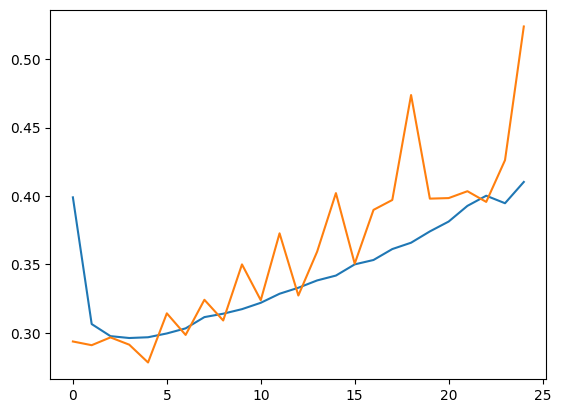

In [131]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

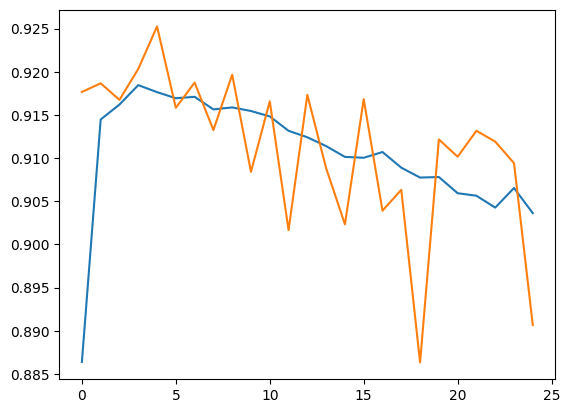

In [132]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

## Testing Our Model

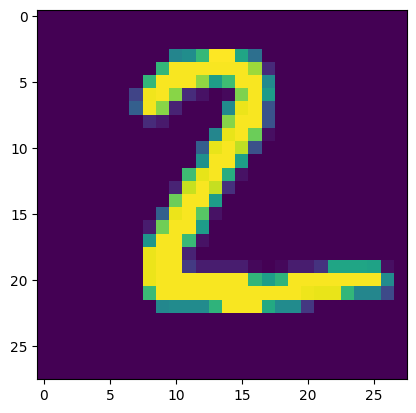

In [133]:
plt.imshow(X_test[1])

In [134]:
# Predicting
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 27ms/step


array([2])

1/1 [==============================] - 0s 16ms/step


array([1])

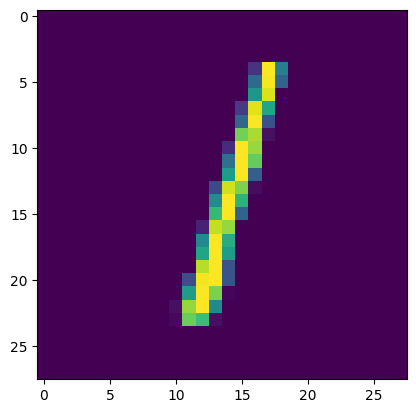

In [135]:
plt.imshow(X_test[2])
model.predict(X_test[2].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 16ms/step


array([9])

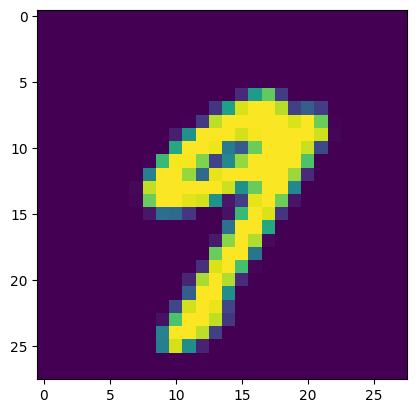

In [136]:
plt.imshow(X_test[20])
model.predict(X_test[20].reshape(1,28,28)).argmax(axis=1)


1/1 [==============================] - 0s 16ms/step


array([3])

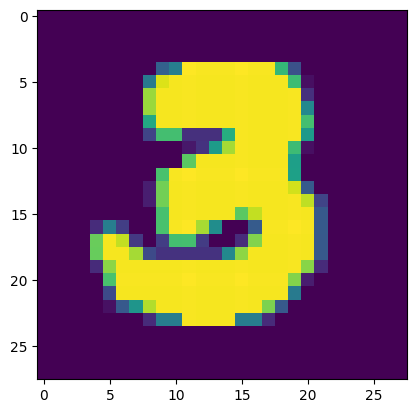

In [137]:
plt.imshow(X_test[200])
model.predict(X_test[200].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 10ms/step


array([2])

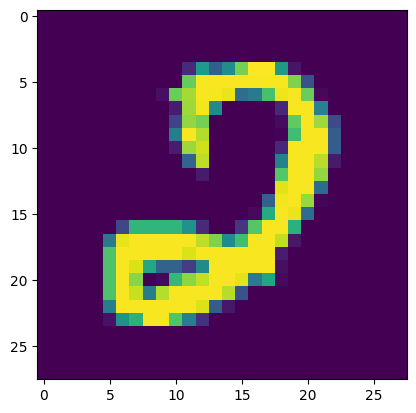

In [141]:
plt.imshow(X_test[201])
model.predict(X_test[201].reshape(1,28,28)).argmax(axis=1)


1/1 [==============================] - 0s 16ms/step


array([1])

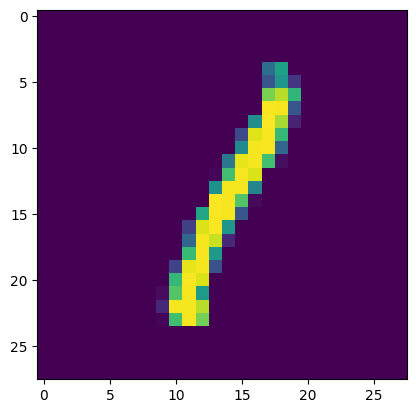

In [142]:
plt.imshow(X_test[202])
model.predict(X_test[202].reshape(1,28,28)).argmax(axis=1)


1/1 [==============================] - 0s 16ms/step


array([6])

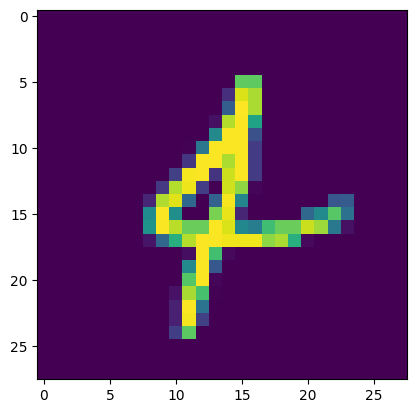

In [143]:
plt.imshow(X_test[300])
model.predict(X_test[300].reshape(1,28,28)).argmax(axis=1)


1/1 [==============================] - 0s 15ms/step


array([2])

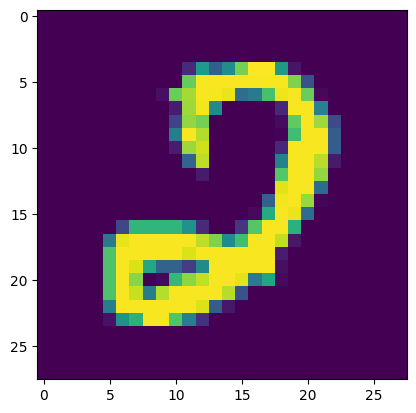

In [144]:
plt.imshow(X_test[400])
model.predict(X_test[400].reshape(1,28,28)).argmax(axis=1)

# Testing on Real Images

In [138]:
# Testing on real images
import cv2 

1/1 [==============================] - 0s 15ms/step


array([3])

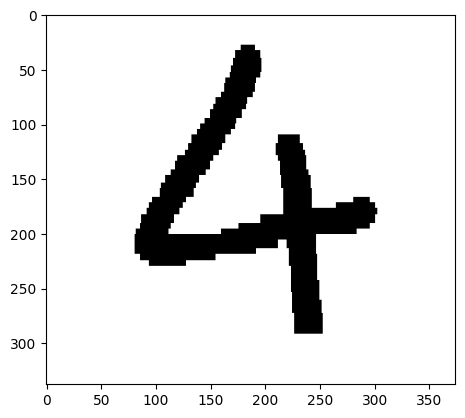

In [147]:
# Testing
test_image = cv2.imread('Digits_Images/4.png') 
plt.imshow(test_image)
test_image.shape
gray = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)
gray.shape
resized = cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)
resized.shape
model.predict(resized.reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 16ms/step


array([2])

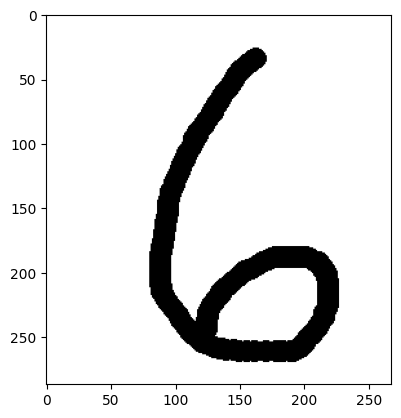

In [140]:
# Testing
test_image = cv2.imread('Digits_Images/6.png') 
plt.imshow(test_image)
test_image.shape
gray = cv2.cvtColor(test_image,cv2.COLOR_BGR2GRAY)
gray.shape
resized = cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)
resized.shape
model.predict(resized.reshape(1,28,28)).argmax(axis=1)

# Model Accuracy

In [148]:
print('Model Accuracy is :',accuracy_score(y_test,y_pred)*100)

Model Accuracy is : 88.75999999999999
